<a href="https://colab.research.google.com/github/gkjunior/machine_learning_sklearn_keras_tf2/blob/main/00_Zweite_erste_schritte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Die Anfänge:
# wieder mit Housing. Als erstes ein working directory anlegen und das file downloaden.

import os
import tarfile
import urllib.request
import glob

print(os.getcwd() +' :'+ str('GoogleColab-Home-Verzeichnis'))

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Funtion zum fetchen der URL:

def fetch_url(url_file = HOUSING_URL, path_file = HOUSING_PATH):
  """
  Funktion zum abgreifen von Files aus dem Github
  Erstellt wenn nötig das Verzeichnis und entpackt das file drin.
  """
  os.makedirs(path_file, exist_ok = True)
  tgz_path = os.path.join(path_file, "housing.tgz")
  urllib.request.urlretrieve(url_file, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = path_file)
  housing_tgz.close()
  print(f"Datei entpackt in {glob.glob(tgz_path)}")

fetch_url()


/content :GoogleColab-Home-Verzeichnis
Datei entpackt in ['datasets/housing/housing.tgz']


In [19]:
# Das File reinladen und kurz analysieren

import pandas as pd

housing = pd.read_csv(HOUSING_PATH + str("/housing.csv"))
print(housing.head(10))
print() #Platzhalter
print(len(housing)) # Einträge

# Ocean proximity ist klasse?
# genauer ins Set gucken

   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY
5    -122.25     37.85  ...            269700.0         NEAR BAY
6    -122.25     37.84  ...            299200.0         NEAR BAY
7    -122.25     37.84  ...            241400.0         NEAR BAY
8    -122.26     37.84  ...            226700.0         NEAR BAY
9    -122.25     37.84  ...            261100.0         NEAR BAY

[10 rows x 10 columns]

20640


In [20]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
housing['ocean_proximity'].value_counts()

# Kat Merkmal mit 5 Ausprägungen

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing.info()

## total bedrooms hat weniger Einträge: Genauer angucken

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


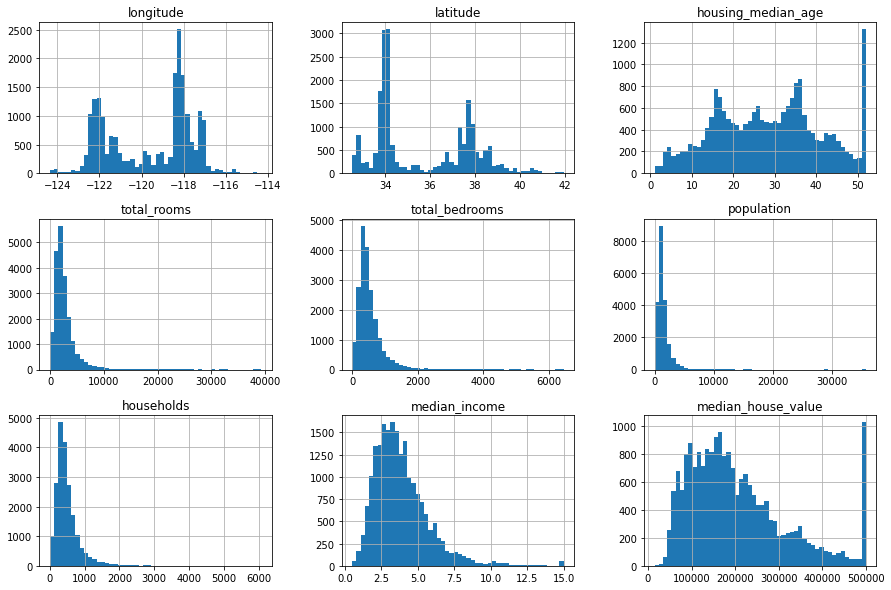

In [24]:
# plotten
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize= (15,10)) # leserlich auf chromebook
plt.show()